In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 24 10:47:46 2018

@author: Kevin D'Cruz
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import pandas as pd
import urllib
import cv2

from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.applications.vgg19 import VGG19, preprocess_input

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

#------------Model Loading---------------------------------
model = ResNet50(weights='imagenet')
target_size = (224, 224)
#model.summary()
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

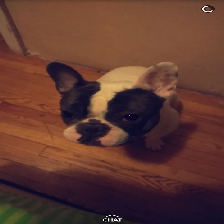

In [3]:
#Local Image path

img_path = "C:/Users/Kevin D'Cruz/Desktop/Haru.jpg"
img = image.load_img(img_path, target_size=(224, 224))


img

Enter a JPG or PNG URL: https://image.freepik.com/free-photo/hrc-siberian-tiger-2-jpg_21253111.jpg


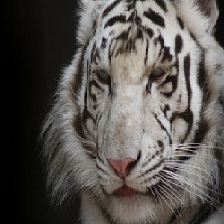

In [114]:
#def image_url(url):
0
#url_response = urllib.request.urlopen(load) #extract the contents of the URL
#img_array = np.array(bytearray(url_response.read()), dtype=np.uint8) #convert it into a numpy array
#img_array

In [4]:
#Prediction function local image
def predict(model, img, target_size=(224,224), top_n=5):
 
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)  
  return decode_predictions(preds, top=top_n)[0]


In [31]:
#Prediction function: URL
def predict(model, image_url, target_size, top_n=5):

  x = image.img_to_array(image_url)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)  
  return decode_predictions(preds, top=top_n)[0]
 





C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


This picture has the highest possibility of a French_bulldog


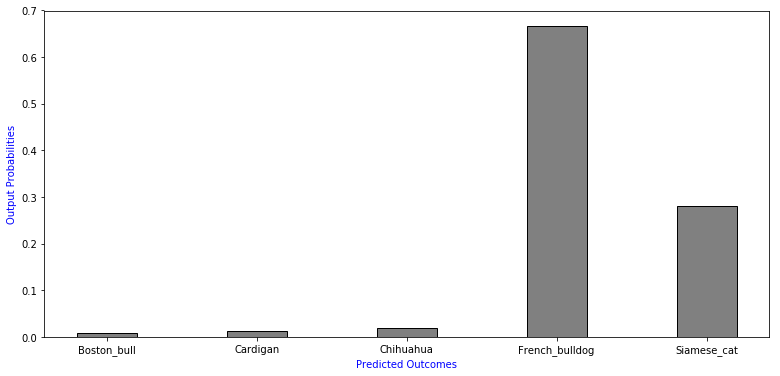

In [36]:
#Plotting: Local Image
prediction = predict(model, img, target_size)
#display(prediction)
prediction=pd.DataFrame(np.array(prediction).reshape(5,3), columns = list("abc"))
graph=prediction.convert_objects(convert_numeric=True)
#graph



print("This picture has the highest possibility of a "+'\033[1m' '\033[4m'+prediction.b[0])
#graph=prediction.convert_objects(convert_numeric=True)

#display(graph)
plt.bar(graph.b, graph.c, align='center', color='gray', edgecolor='black', width=0.4)
plt.rcParams['figure.figsize'] = 13,6
plt.xlabel("Predicted Outcomes", color='blue')
plt.ylabel("Output Probabilities", color='blue')
plt.savefig('ResNet50_Local.jpg', bbox_inches='tight')


This picture has the highest possibility of a French_bulldog


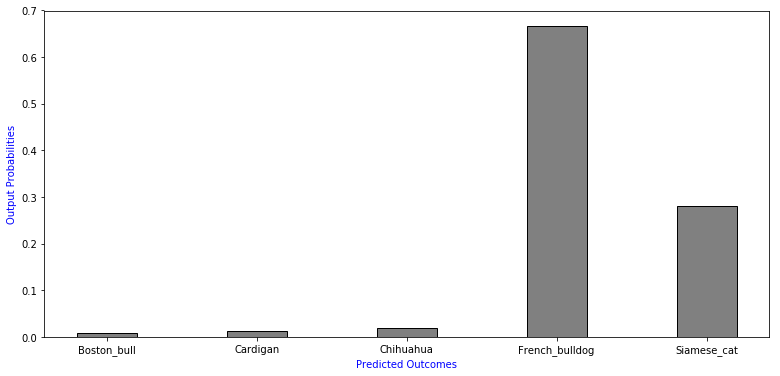

In [52]:
a=plt.savefig('Yo.png', bbox_inches='tight')


None


This picture has the highest possibility of a tiger


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


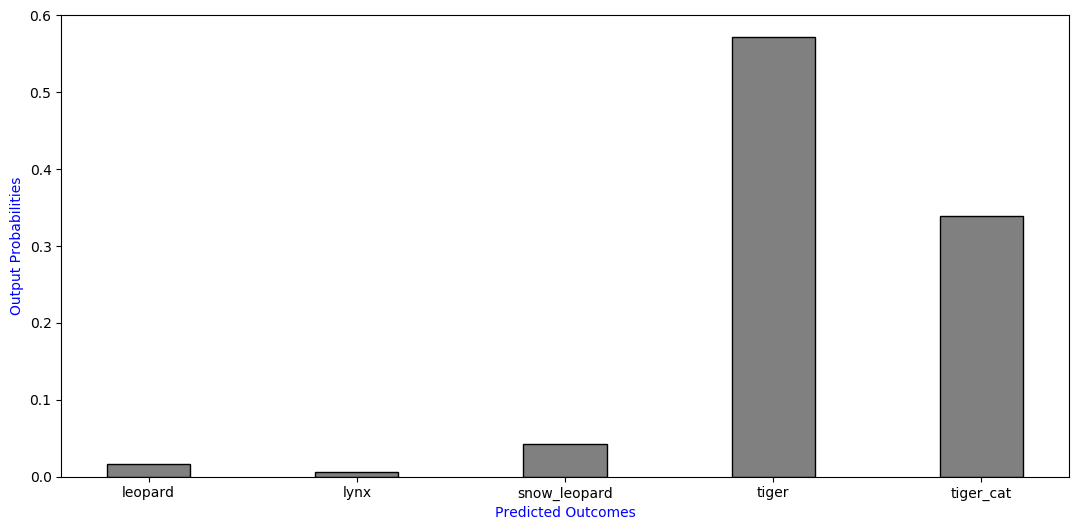

In [116]:
#Plotting: URL
prediction = predict(model, image_url, target_size)
prediction=pd.DataFrame(np.array(prediction).reshape(5,3), columns = list("abc"))
print("This picture has the highest possibility of a "+'\033[1m' '\033[4m'+prediction.b[0])
graph=prediction.convert_objects(convert_numeric=True)

plt.bar(graph.b, graph.c, align='center', color='gray', edgecolor='black', width=0.4)
plt.rcParams['figure.figsize'] = 13,6
plt.xlabel("Predicted Outcomes", color='blue')
plt.ylabel("Output Probabilities", color='blue')
plt.show()

#plt.show()